In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/Transporte_Publico_Espana.csv')

### Empezamos con la exploracion dl csv ( EDA y ETL )

In [3]:
df.head(3)

,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
0,1,2023-01-01 00:00:00,Barcelona - Bilbao,NaN,not_available,999,Tranvía,Sevilla,Sunday
1,2,2023-01-01 00:01:00,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday


En un principio vemos que hay NaN y un valor de 999 minutos de retraso para el ID 1.
La fecha esta con año-mes-dia-hora-minutos-segundos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


Hay que transformar la fecha a datetime.
Duracion_Viaje_Minutos no tiene el typo correcto deberia ser numerico

In [5]:
df.describe()

,ID_Viaje,Numero_Pasajeros,Retraso_Minutos
count,100100.000000,99099.000000,100100.000000
mean,49950.599900,54.465171,64.044685
std,28896.352622,25.956460,74.795155
min,1.000000,10.000000,0.000000
25%,24925.750000,32.000000,29.000000
50%,49950.500000,54.000000,59.000000
75%,74975.250000,77.000000,90.000000
max,100000.000000,99.000000,999.000000


Retraso_Minutos presenta un valor maximo de 999 muy fura de rango si tomamos max + std

In [6]:
df.duplicated().sum() 

100

Hay valores duplicados !!

In [7]:
df.isnull().sum()

ID_Viaje                     0
Fecha                        0
Ruta                         0
Numero_Pasajeros          1001
Duracion_Viaje_Minutos     333
Retraso_Minutos              0
Tipo_Transporte              0
Region                       0
Dia_Semana                   0
dtype: int64

In [8]:
df_copia1 = df.copy()

Comenzamos a transformar !!

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df['Duracion_Viaje_Minutos'] = pd.to_numeric(df['Duracion_Viaje_Minutos'], errors='coerce')

Dos opciones imputar valores o dropear los valores faltantes o Nan. (cantidad <1.5%)

In [13]:
df = df.dropna(subset=['Numero_Pasajeros'])

In [14]:
df['Duracion_Viaje_Minutos'] = df['Duracion_Viaje_Minutos'].fillna(df['Duracion_Viaje_Minutos'].mean())

Columna Retraso_Minutos: Eliminar 500 registros en un dataset de 100,000 representa solo el 0.5% del total, lo cual es un impacto mínimo en términos de representatividad.

In [15]:
df = df[df['Retraso_Minutos'] != 999]

In [16]:
df.shape

(99000, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99000 entries, 1 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Viaje                99000 non-null  int64         
 1   Fecha                   99000 non-null  datetime64[ns]
 2   Ruta                    99000 non-null  object        
 3   Numero_Pasajeros        99000 non-null  float64       
 4   Duracion_Viaje_Minutos  99000 non-null  float64       
 5   Retraso_Minutos         99000 non-null  int64         
 6   Tipo_Transporte         99000 non-null  object        
 7   Region                  99000 non-null  object        
 8   Dia_Semana              99000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 7.6+ MB


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

ID_Viaje                  0
Fecha                     0
Ruta                      0
Numero_Pasajeros          0
Duracion_Viaje_Minutos    0
Retraso_Minutos           0
Tipo_Transporte           0
Region                    0
Dia_Semana                0
dtype: int64

Para poder buscar patrones por mes, dia y hora creo nuevas columnas a partir de la columna Fecha. Ademas 

In [20]:
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour
df = df.drop(columns='Fecha')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99000 entries, 1 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Viaje                99000 non-null  int64  
 1   Ruta                    99000 non-null  object 
 2   Numero_Pasajeros        99000 non-null  float64
 3   Duracion_Viaje_Minutos  99000 non-null  float64
 4   Retraso_Minutos         99000 non-null  int64  
 5   Tipo_Transporte         99000 non-null  object 
 6   Region                  99000 non-null  object 
 7   Dia_Semana              99000 non-null  object 
 8   Mes                     99000 non-null  int32  
 9   Día                     99000 non-null  int32  
 10  Hora                    99000 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 7.9+ MB


In [22]:
df.head(3)

,ID_Viaje,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana,Mes,Día,Hora
1,2,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday,1,1,0
2,3,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday,1,1,0
3,4,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday,1,1,0


In [23]:
df_copia2 = df.copy

In [24]:
df.shape

(99000, 11)

#### Analisis descriptivo de los retrasos

In [25]:
df.Retraso_Minutos.describe()

count    99000.000000
mean        59.330869
std         34.688765
min          0.000000
25%         29.000000
50%         59.000000
75%         89.000000
max        119.000000
Name: Retraso_Minutos, dtype: float64

La media de los retrasos es de aproximadamente 59 minutos, con una considerable variabilidad (std de 34.69 minutos), indicando que los retrasos pueden variar ampliamente.

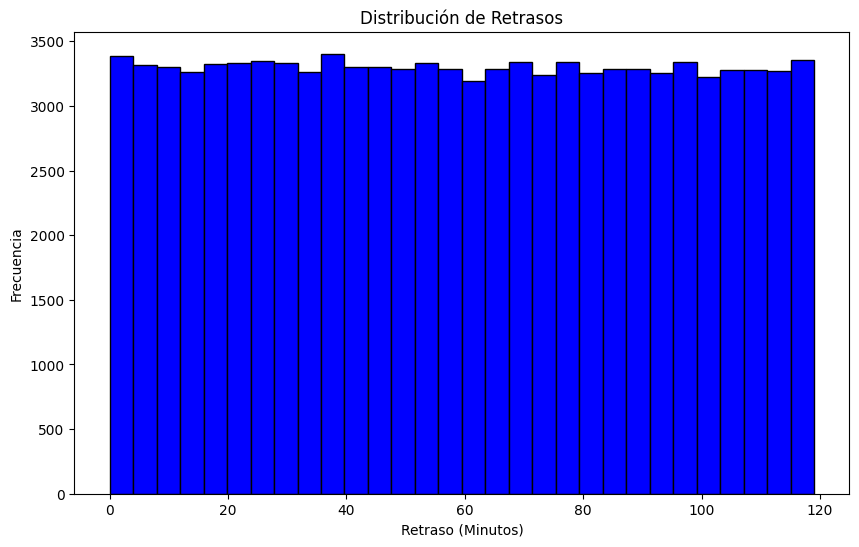

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Retraso_Minutos'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Retraso (Minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Retrasos')
plt.show()


El histograma muestra una distribución uniforme de los retrasos en minutos, indicando que los retrasos están distribuidos de manera bastante equitativa a lo largo del rango de 0 a 120 minutos.

##### Segmentación por Variables

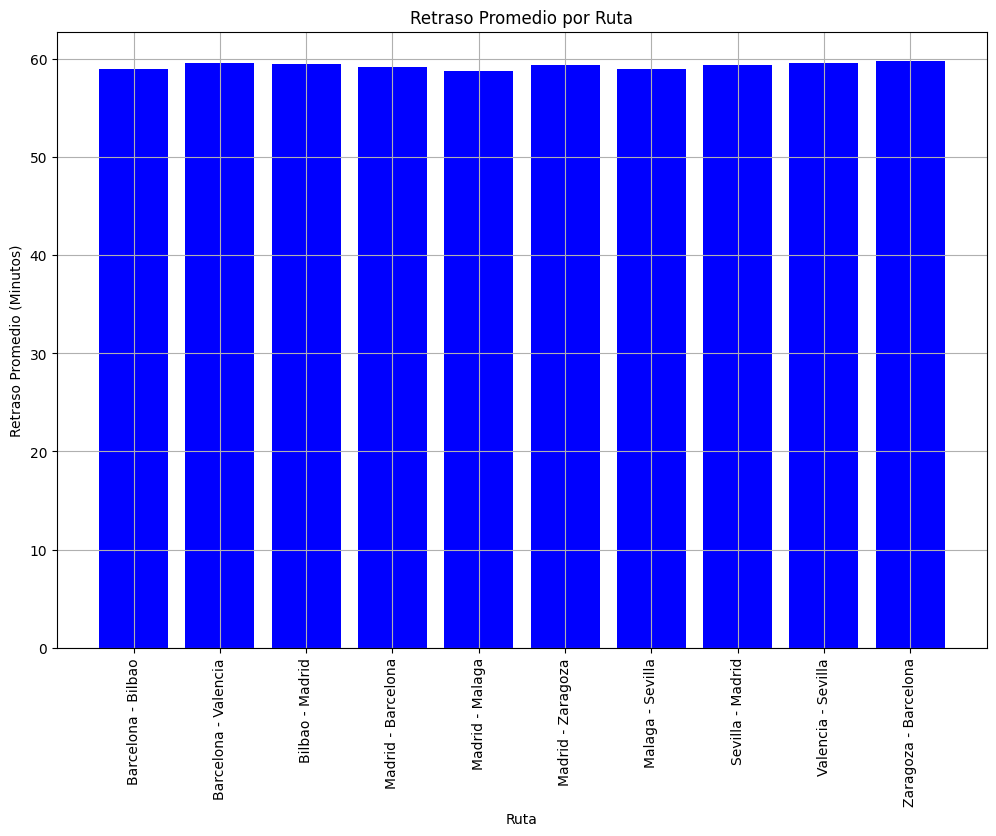

In [27]:
# Retraso promedio por ruta
average_delay_by_route = df.groupby('Ruta')['Retraso_Minutos'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_delay_by_route['Ruta'], average_delay_by_route['Retraso_Minutos'], color='blue')
plt.xlabel('Ruta')
plt.ylabel('Retraso Promedio (Minutos)')
plt.title('Retraso Promedio por Ruta')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Dado que los retrasos son uniformes entre las rutas, podría ser útil investigar factores sistémicos, como la infraestructura general, la planificación de horarios o la gestión operativa

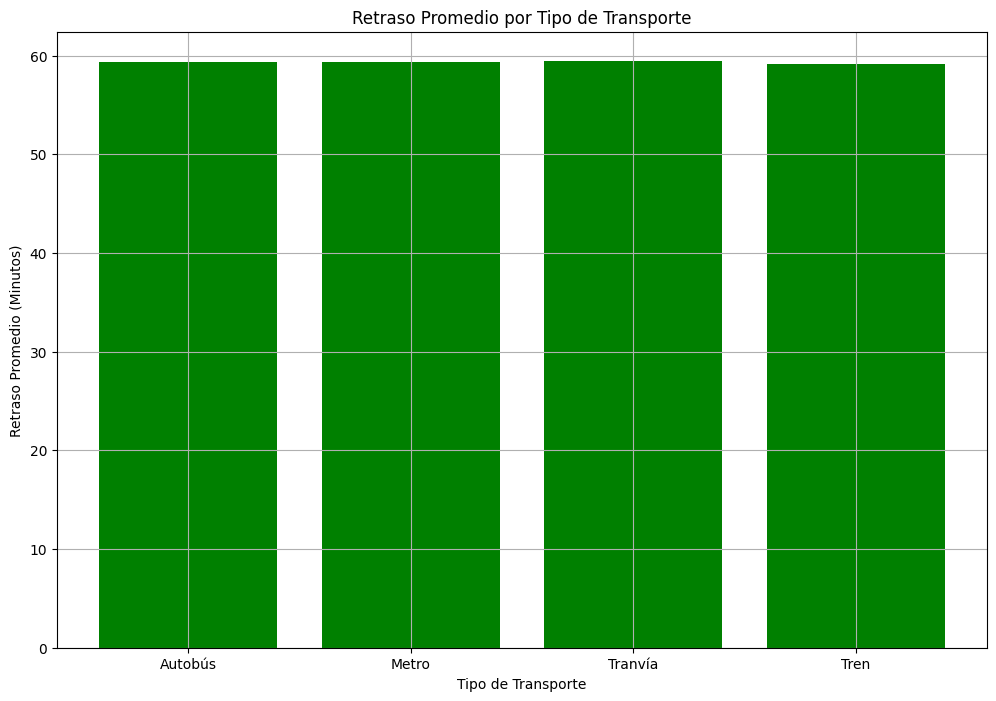

In [28]:
# Retraso promedio por tipo de transporte
average_delay_by_transport = df.groupby('Tipo_Transporte')['Retraso_Minutos'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_delay_by_transport['Tipo_Transporte'], average_delay_by_transport['Retraso_Minutos'], color='green')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Retraso Promedio (Minutos)')
plt.title('Retraso Promedio por Tipo de Transporte')
plt.grid(True)
plt.show()


Los retrasos no parecen estar influenciados por el tipo de transporte, por lo que podría ser útil investigar factores externos o sistémicos que afecten a todos los modos de transporte de manera similar.

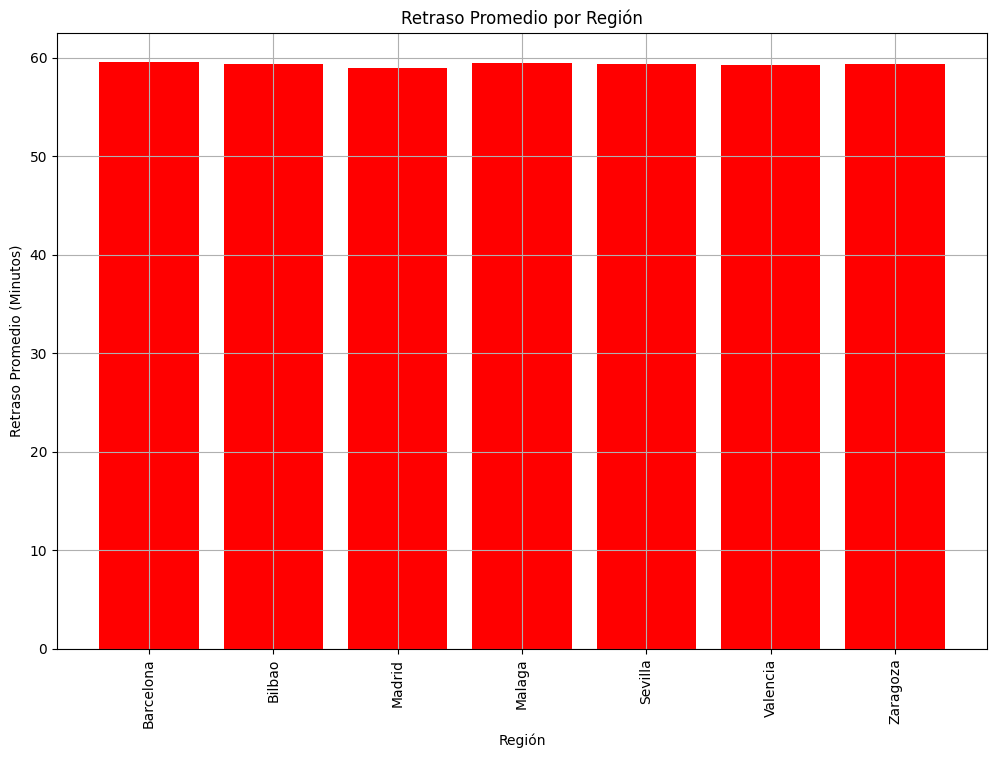

In [29]:
# Retraso promedio por región
average_delay_by_region = df.groupby('Region')['Retraso_Minutos'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_delay_by_region['Region'], average_delay_by_region['Retraso_Minutos'], color='red')
plt.xlabel('Región')
plt.ylabel('Retraso Promedio (Minutos)')
plt.title('Retraso Promedio por Región')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Los retrasos no parecen estar influenciados por la ubicación geográfica, lo que apunta a la posibilidad de factores sistémicos o nacionales que afectan el transporte en general.

#### Análisis Temporal

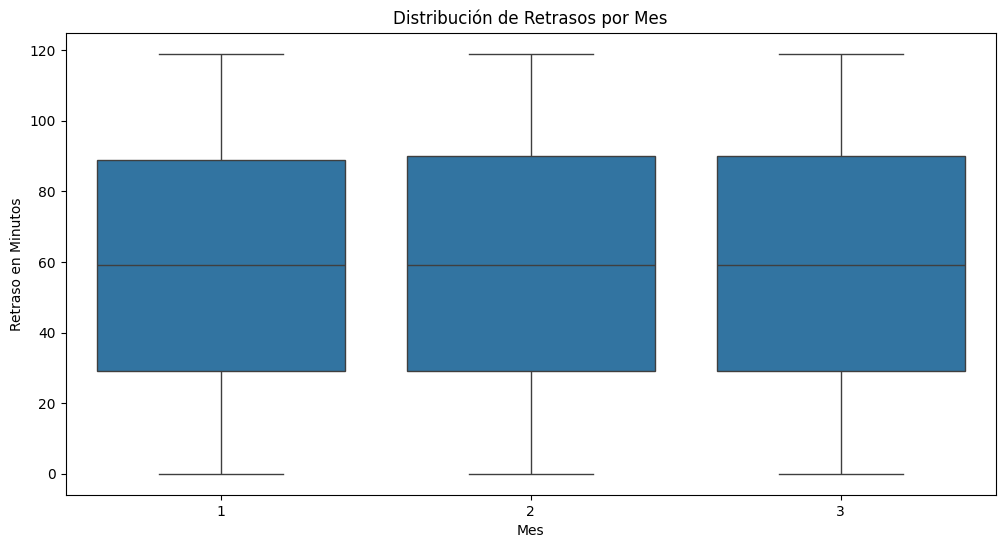

In [30]:
# Por Mes
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes', y='Retraso_Minutos', data=df)
plt.title('Distribución de Retrasos por Mes')
plt.xlabel('Mes')
plt.ylabel('Retraso en Minutos')
plt.show()


La distribución de los retrasos por mes es uniforme, indicando que no hay una variación significativa en los retrasos entre estos meses. Esto sugiere que los factores que causan los retrasos son consistentes a lo largo del tiempo en este periodo. Solo se trabajo con el mes de enero, Febrero y 11 dias del mes de Marzo.

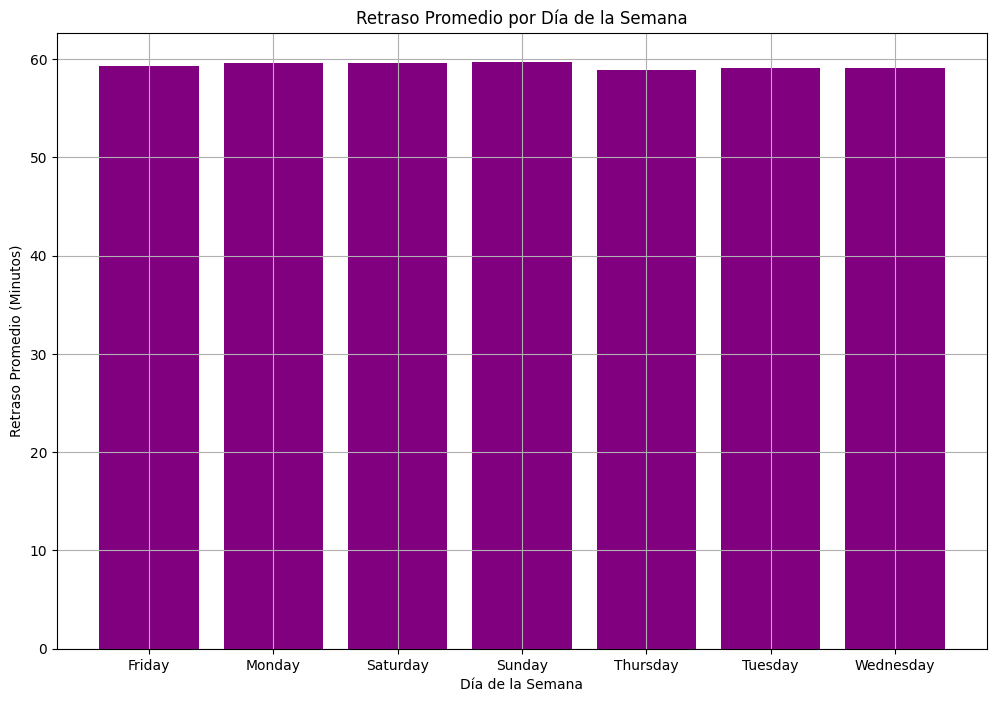

In [31]:
# Por día de la semana
average_delay_by_day = df.groupby('Dia_Semana')['Retraso_Minutos'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_delay_by_day['Dia_Semana'], average_delay_by_day['Retraso_Minutos'], color='purple')
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso Promedio (Minutos)')
plt.title('Retraso Promedio por Día de la Semana')
plt.grid(True)
plt.show()

 Los retrasos no parecen estar influenciados por el día de la semana, lo que apunta a la posibilidad de factores sistémicos que afectan el transporte de manera uniforme cada día.

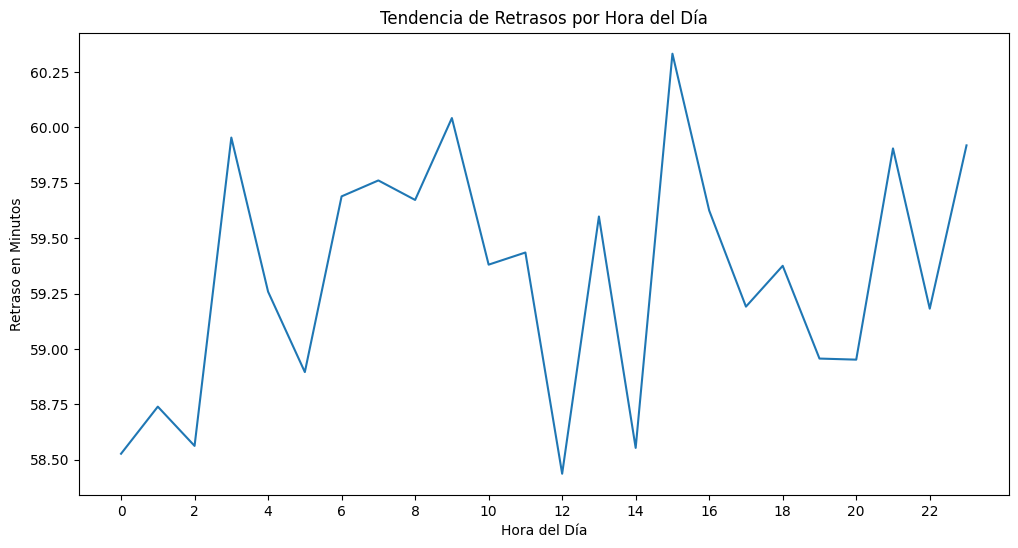

In [32]:
# Por Hora
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hora', y='Retraso_Minutos', data=df, errorbar=None)
plt.title('Tendencia de Retrasos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Retraso en Minutos')
plt.xticks(ticks=range(0, 24, 2))
plt.show()


La variabilidad en los retrasos a lo largo del día sugiere que hay factores temporales que influyen en la puntualidad del transporte, posiblemente relacionados con la demanda de pasajeros, la congestión del tráfico o la programación de los servicios.
Considerar ajustes en los horarios de los servicios de transporte durante las horas pico identificadas para mitigar los retrasos.

In [33]:
df.Ruta.unique()

array(['Malaga - Sevilla', 'Madrid - Zaragoza', 'Sevilla - Madrid',
       'Madrid - Malaga', 'Madrid - Barcelona', 'Bilbao - Madrid',
       'Valencia - Sevilla', 'Barcelona - Valencia',
       'Zaragoza - Barcelona', 'Barcelona - Bilbao'], dtype=object)

In [34]:
df.head(3)

,ID_Viaje,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana,Mes,Día,Hora
1,2,Malaga - Sevilla,99.0,192.0,58,Tren,Barcelona,Sunday,1,1,0
2,3,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday,1,1,0
3,4,Sevilla - Madrid,96.0,650.0,2,Metro,Malaga,Sunday,1,1,0


#### Conectamos a MySQL

In [ ]:
#! pip install mysql-connector-python

In [ ]:
import mysql.connector

db_config_no_db = {
    'user': 'root',
    'password': '1409',
    'host': 'localhost'
}
conn = mysql.connector.connect(**db_config_no_db)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS transporte_publico")
conn.commit()
conn.close()

Creamos las tablas en Python y las generamos en MySQL

In [ ]:
db_config = {
    'user': 'root',
    'password': '1409',
    'host': 'localhost'
}
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS transporte_publico")
cursor.execute("USE transporte_publico")

cursor.execute('''
CREATE TABLE IF NOT EXISTS rutas (
    ID_Ruta INT AUTO_INCREMENT PRIMARY KEY,
    Ruta VARCHAR(255) UNIQUE
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS tipos_transporte (
    ID_Tipo_Transporte INT AUTO_INCREMENT PRIMARY KEY,
    Tipo_Transporte VARCHAR(50) UNIQUE
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS regiones (
    ID_Region INT AUTO_INCREMENT PRIMARY KEY,
    Region VARCHAR(50) UNIQUE
)
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS viajes (
    ID_Viaje INT PRIMARY KEY,
    ID_Ruta INT,
    Numero_Pasajeros FLOAT,
    Duracion_Viaje_Minutos FLOAT,
    Retraso_Minutos INT,
    ID_Tipo_Transporte INT,
    ID_Region INT,
    Dia_Semana VARCHAR(20),
    Mes INT,
    Día INT,
    Hora INT,
    FOREIGN KEY (ID_Ruta) REFERENCES rutas(ID_Ruta),
    FOREIGN KEY (ID_Tipo_Transporte) REFERENCES tipos_transporte(ID_Tipo_Transporte),
    FOREIGN KEY (ID_Region) REFERENCES regiones(ID_Region)
)
''')
conn.commit()


Llenamos las tablas desde python en MySQL 

In [ ]:
for ruta in df['Ruta'].unique():
    cursor.execute('INSERT IGNORE INTO rutas (Ruta) VALUES (%s)', (ruta,))
for tipo in df['Tipo_Transporte'].unique():
    cursor.execute('INSERT IGNORE INTO tipos_transporte (Tipo_Transporte) VALUES (%s)', (tipo,))
for region in df['Region'].unique():
    cursor.execute('INSERT IGNORE INTO regiones (Region) VALUES (%s)', (region,))
conn.commit()


In [ ]:
datos_viajes = df.to_records(index=False).tolist()
consulta_insercion_viajes = '''
INSERT INTO viajes (
    ID_Viaje, ID_Ruta, Numero_Pasajeros, Duracion_Viaje_Minutos, Retraso_Minutos, 
    ID_Tipo_Transporte, ID_Region, Dia_Semana, Mes, Día, Hora
) VALUES (
    %s, 
    (SELECT ID_Ruta FROM rutas WHERE Ruta = %s),
    %s, %s, %s, 
    (SELECT ID_Tipo_Transporte FROM tipos_transporte WHERE Tipo_Transporte = %s),
    (SELECT ID_Region FROM regiones WHERE Region = %s),
    %s, %s, %s, %s
)
'''
datos_viajes_preparados = [
    (
        row.ID_Viaje, row.Ruta, row.Numero_Pasajeros, row.Duracion_Viaje_Minutos, row.Retraso_Minutos, 
        row.Tipo_Transporte, row.Region, row.Dia_Semana, row.Mes, row.Día, row.Hora
    )
    for row in df.itertuples()
]

cursor.executemany(consulta_insercion_viajes, datos_viajes_preparados)
conn.commit()
conn.close()


#### Guardamos los datos en un csv

In [35]:
df.to_csv('transporte_publico_limpio.csv', index=False)

Dado que no hay patrones visibles, verificamos por correlacion
### Verificacion de la correlacion entre las columnas

Tranformo todos los datos a numericos

In [36]:
def transform_column_to_int(df, column_name):
    categories = df[column_name].unique()
    category_map = {category: idx for idx, category in enumerate(categories)}
    df[column_name] = df[column_name].apply(lambda x: category_map[x])
    df[column_name] = df[column_name].astype('int64')
    return df


columns_to_transform = ['Ruta', 'Tipo_Transporte', 'Region', 'Dia_Semana']
for column in columns_to_transform:
    df = transform_column_to_int(df, column)

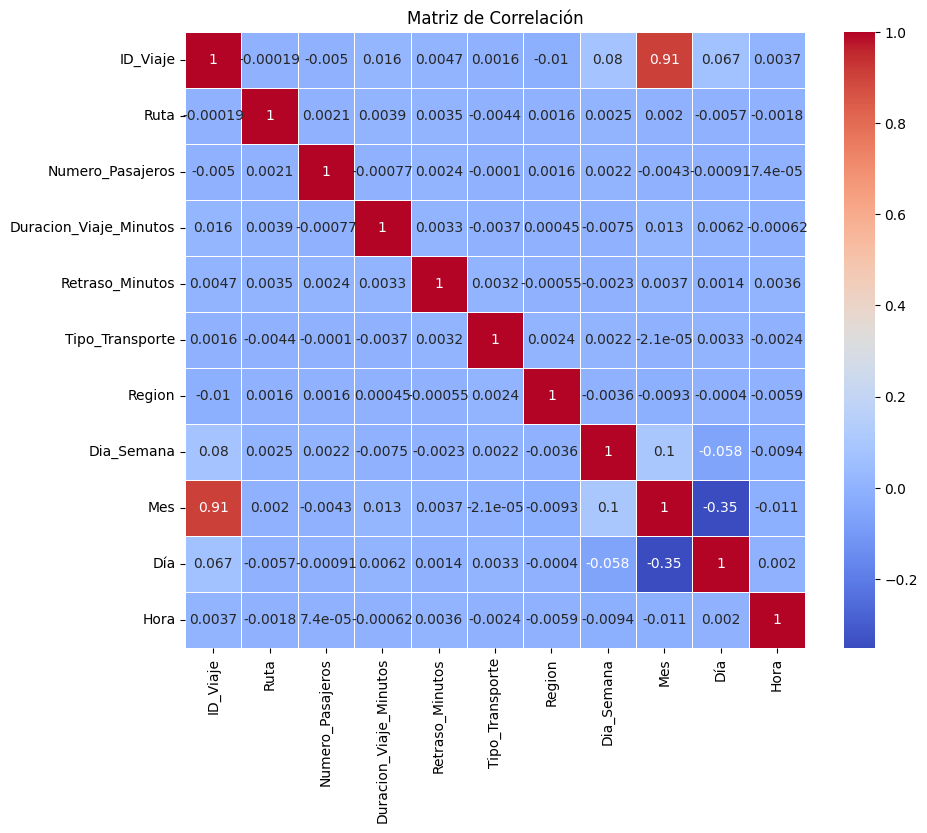

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

La mayoría de las correlaciones entre variables son muy bajas, cercanas a cero, lo que indica que no hay una relación lineal fuerte entre estas variables.